In [1]:
import sys
sys.path.append('../')

from cogsci2017.environment.arm_diva_env import CogSci2017Environment
from cogsci2017.learning.supervisor import Supervisor
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

iterations = 2000

environment = CogSci2017Environment(gui=False, audio=False)


config = dict(m_mins=environment.conf.m_mins,
             m_maxs=environment.conf.m_maxs,
             s_mins=environment.conf.s_mins,
             s_maxs=environment.conf.s_maxs)

agent = Supervisor(config, model_babbling="random", n_motor_babbling=1000, explo_noise=0.05)



human sounds ['uyi', 'oiy', 'ieu', 'yeo', 'euo', 'uie']


Iteration 0


../cogsci2017/environment/diva/diva.py:169: RuntimeWarning: invalid value encountered in log2
  formants = log2(transpose(res[self.s_used,:]))


Iteration 200
Iteration 400
Iteration 600
Iteration 800
best_vocal_errors [('uyi', 0.83878942986188321), ('oiy', 0.6498074147786389), ('ieu', 1.0475211257293491), ('yeo', 0.62053834903006211), ('euo', 1.0057222426285983), ('uie', 0.88521326646381293)]
Iteration 1000
mod1 s [ 0.02766938  0.35013232  0.38282009  0.35397886  0.3630065   0.49312651
  0.25414858 -0.10685791 -0.07768203  0.1045249 ] sx [ 0.02766938  0.35013232  0.38282009  0.35397886  0.3630065 ] sy [ 0.49312651  0.25414858 -0.10685791 -0.07768203  0.1045249 ] True
mod2 s [-0.20560046 -0.15715401 -0.20560046 -0.20560046 -0.20560046 -0.20560046
 -0.20560046 -0.15715401 -0.15715401 -0.15715401 -0.15715401 -0.15715401] sx [-0.20560046 -0.20560046 -0.20560046 -0.20560046 -0.20560046] sy [-0.15715401 -0.15715401 -0.15715401 -0.15715401 -0.15715401] True
mod3 s [-0.20560046 -0.15715401 -0.01911177  0.24785918 -0.01911177 -0.01911177
 -0.01911177 -0.01911177 -0.01911177  0.24785918  0.24785918  0.24785918
  0.24785918  0.24785918] 

(-9.25, -7.5)

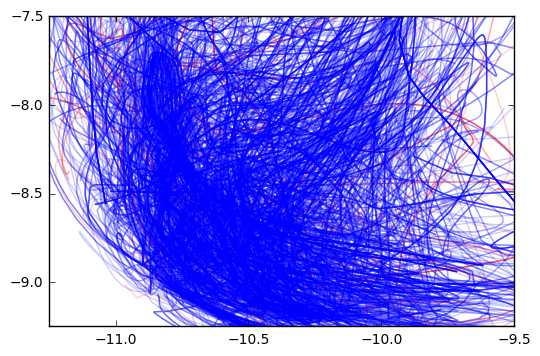

In [2]:
for i in range(iterations):
    if i % (iterations/10) == 0:
        print "Iteration", i
    context = environment.get_current_context()
    m = agent.produce(context)
    s = environment.update(m)
    agent.perceive(s)
    s_traj = environment.diva_traj
    if s_traj is not None:
        if i < 100:
            plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="r", alpha=0.2)
        else:
            plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="b", alpha=0.2)
            
plt.xlim([-11.25,-9.5])
plt.ylim([-9.25, -7.5])

error oiy 0.639352616533


(-9.25, -7.5)

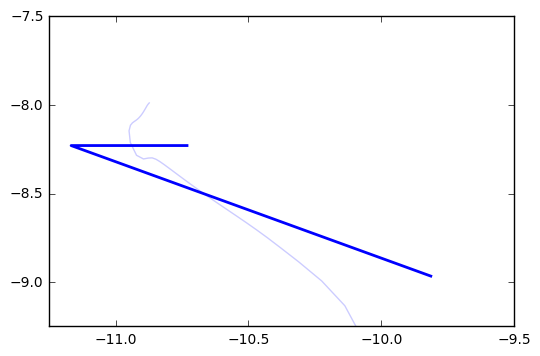

In [173]:
#for hs in human_sounds:
hs = "oiy"
agent.modules["mod13"].sm.sigma_expl = np.array([0.1]*28)
#print agent.modules["mod13"].sm.sigma_expl
m = agent.modules["mod13"].inverse(np.array(environment.human_sounds_traj_std[hs]), explore=True) 
#print m
s = environment.update([0.]*21 + list(m))
s_traj = environment.diva_traj
#print s_traj
error = np.linalg.norm(np.array(environment.human_sounds_traj[hs]) - np.array([f[0] for f in s_traj[[0, 12, 24, 37, 49]]] + [f[1] for f in s_traj[[0, 12, 24, 37, 49]]]))
print "error", hs, error


plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="b", alpha=0.2)    
plt.plot(- np.array(environment.human_sounds_traj[hs][5:]), -np.array(environment.human_sounds_traj[hs][:5]), lw=2)

plt.xlim([-11.25,-9.5])
plt.ylim([-9.25, -7.5])

In [3]:

for i in range(100):
    context = environment.get_current_context()[:4]
    s_goal = [2. * np.random.random() - 1. for _ in range(10)]

    m = agent.modules["mod10"].inverse(np.array(context + s_goal), explore=True)
    m = [0.] * 21 + list(m)
    s = environment.update(m)
    if environment.produced_sound:
        print environment.produced_sound
    agent.perceive(s)

In [5]:
print agent.modules["mod10"].sm.model.imodel.fmodel.dataset.data[1]

[array([-0.34647874, -0.8005152 , -0.0157184 , -0.13216634, -0.34647874,
       -0.34647874, -0.34647874, -0.34647874, -0.34647874, -0.8005152 ,
       -0.8005152 , -0.8005152 , -0.8005152 , -0.8005152 ]), array([-0.34647874, -0.8005152 , -0.64154138, -0.82767482, -0.34647874,
       -0.34647874, -0.34647874, -0.34647874, -0.34647874, -0.8005152 ,
       -0.8005152 , -0.8005152 , -0.8005152 , -0.8005152 ]), array([-0.34647874, -0.8005152 ,  0.24018425,  0.17167219, -0.34647874,
       -0.34647874, -0.34647874, -0.34647874, -0.34647874, -0.8005152 ,
       -0.8005152 , -0.8005152 , -0.8005152 , -0.8005152 ]), array([-0.34647874, -0.8005152 ,  0.3607775 ,  0.45346928, -0.34647874,
       -0.34647874, -0.34647874, -0.34647874, -0.34647874, -0.8005152 ,
       -0.8005152 , -0.8005152 , -0.8005152 , -0.8005152 ]), array([-0.34647874, -0.8005152 , -0.6228    , -0.17362947, -0.34647874,
       -0.34647874, -0.34647874, -0.34647874, -0.34647874, -0.8005152 ,
       -0.8005152 , -0.8005152 , -0